# [Taller 05] Mínimos cuadrados

- INTEGRANTES: Richard Tipantiza y Jairo Angulo

[Repositorio del Taller](https://github.com/keyaru18/Taller04_M-nimos_Cuadrados.git)

A)  Interpole los puntos:

$p_1 = (5.4, 3.2)$

$p2_i = (9.5, 0.7)$

$p3 = (12.3, -3.6)$

De estos, el punto $p2_i$ debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos. 

**El siguiente código, ejecutar en un archivo .py**.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

## Clase InteractiveParabola

La clase principal que maneja toda la funcionalidad interactiva. Permite visualizar una parábola que pasa por tres puntos (P1, P2, P3), donde P2 es arrastrable.

In [8]:
class InteractiveParabola:
    def __init__(self):
        # Puntos iniciales
        self.p1 = np.array([5.4, 3.2])
        self.p2 = np.array([9.5, 0.7])  # Punto interactivo
        self.p3 = np.array([12.3, -3.6])
        
        # Variables para el arrastre
        self.dragging = False
        self.drag_threshold = 0.5  # Distancia mínima para detectar click en punto
        
        # Configurar la figura
        self.fig, self.ax = plt.subplots(figsize=(12, 8))
        self.ax.set_title('Interpolación Interactiva de Parábola\n(Arrastra el punto rojo para cambiar la curva)', 
                         fontsize=14, fontweight='bold')
        self.ax.grid(True, alpha=0.3)
        self.ax.set_xlabel('X', fontsize=12)
        self.ax.set_ylabel('Y', fontsize=12)
        
        # Inicializar elementos gráficos
        self.setup_plot()
        
        # Conectar eventos
        self.fig.canvas.mpl_connect('button_press_event', self.on_press)
        self.fig.canvas.mpl_connect('motion_notify_event', self.on_motion)
        self.fig.canvas.mpl_connect('button_release_event', self.on_release)
        
        # Dibujar inicialmente
        self.update_parabola()

### Configuración inicial del gráfico

El método `setup_plot` inicializa todos los elementos visuales:
- Línea de la parábola
- Puntos fijos (P1 y P3)
- Punto interactivo (P2)
- Círculo de ayuda visual
- Leyenda y texto informativo

In [9]:
    def setup_plot(self):
        """Configurar los elementos gráficos iniciales"""
        # Línea de la parábola
        self.parabola_line, = self.ax.plot([], [], 'b-', linewidth=3, label='Parábola interpolada')
        
        # Puntos fijos
        self.point1 = self.ax.plot(self.p1[0], self.p1[1], 'go', markersize=10, 
                                  label=f'P1 (fijo): ({self.p1[0]:.1f}, {self.p1[1]:.1f})')[0]
        self.point3 = self.ax.plot(self.p3[0], self.p3[1], 'mo', markersize=10, 
                                  label=f'P3 (fijo): ({self.p3[0]:.1f}, {self.p3[1]:.1f})')[0]
        
        # Punto interactivo (P2)
        self.point2 = self.ax.plot(self.p2[0], self.p2[1], 'ro', markersize=12, 
                                  label=f'P2 (arrastrable): ({self.p2[0]:.1f}, {self.p2[1]:.1f})')[0]
        
        # Círculo de ayuda visual para el punto arrastrable
        self.drag_circle = Circle((self.p2[0], self.p2[1]), self.drag_threshold, 
                                 fill=False, linestyle='--', color='red', alpha=0.3)
        self.ax.add_patch(self.drag_circle)
        
        # Configurar límites y leyenda
        self.ax.set_xlim(3, 15)
        self.ax.set_ylim(-6, 5)
        self.ax.legend(loc='upper right')
        
        # Texto informativo
        self.info_text = self.ax.text(0.02, 0.98, '', transform=self.ax.transAxes, 
                                     verticalalignment='top', fontsize=10,
                                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

### Interpolación de la parábola

El método `interpolate_parabola` calcula los coeficientes del polinomio cuadrático que pasa por los tres puntos usando `np.polyfit`.

In [10]:
    def interpolate_parabola(self):
        """Calcular la parábola que pasa por los tres puntos usando interpolación polinómica"""
        # Extraer coordenadas
        points = np.array([self.p1, self.p2, self.p3])
        x_points = points[:, 0]
        y_points = points[:, 1]
        
        # Usar polyfit para obtener coeficientes de la parábola (grado 2)
        coefficients = np.polyfit(x_points, y_points, 2)
        
        return coefficients

### Evaluación y actualización de la parábola

Los métodos `evaluate_parabola` y `update_parabola` se encargan de:
1. Evaluar la parábola en un rango de valores x
2. Actualizar todos los elementos visuales cuando cambia la posición del punto

In [11]:
    def evaluate_parabola(self, x_vals, coefficients):
        """Evaluar la parábola en los puntos x dados"""
        return np.polyval(coefficients, x_vals)
    
    def update_parabola(self):
        """Actualizar la visualización de la parábola"""
        # Calcular coeficientes
        coeffs = self.interpolate_parabola()
        
        # Generar puntos para la curva suave
        x_min = min(self.p1[0], self.p2[0], self.p3[0]) - 1
        x_max = max(self.p1[0], self.p2[0], self.p3[0]) + 1
        x_curve = np.linspace(x_min, x_max, 200)
        y_curve = self.evaluate_parabola(x_curve, coeffs)
        
        # Actualizar la línea de la parábola
        self.parabola_line.set_data(x_curve, y_curve)
        
        # Actualizar la posición del punto P2 y su círculo de ayuda
        self.point2.set_data([self.p2[0]], [self.p2[1]])
        self.drag_circle.center = (self.p2[0], self.p2[1])
        
        # Actualizar etiquetas
        self.ax.legend([self.parabola_line, self.point1, self.point2, self.point3],
                      ['Parábola interpolada',
                       f'P1 (fijo): ({self.p1[0]:.1f}, {self.p1[1]:.1f})',
                       f'P2 (arrastrable): ({self.p2[0]:.1f}, {self.p2[1]:.1f})',
                       f'P3 (fijo): ({self.p3[0]:.1f}, {self.p3[1]:.1f})'],
                      loc='upper right')
        
        # Mostrar ecuación de la parábola
        a, b, c = coeffs
        equation = f'Ecuación: y = {a:.3f}x² + {b:.3f}x + {c:.3f}'
        self.info_text.set_text(f'{equation}\n\nInstrucciones:\n• Haz clic y arrastra el punto rojo\n• La parábola se actualiza en tiempo real')
        
        # Redibujar
        self.fig.canvas.draw()

### Manejo de eventos interactivos

Los siguientes métodos manejan la interacción con el usuario:
- `distance_to_point`: Calcula distancia para detectar clicks
- `on_press`: Inicia el arrastre
- `on_motion`: Actualiza posición durante el arrastre
- `on_release`: Finaliza el arrastre

In [12]:
    def distance_to_point(self, event_pos, point_pos):
        """Calcular distancia euclidiana entre posición del evento y un punto"""
        return np.sqrt((event_pos[0] - point_pos[0])**2 + (event_pos[1] - point_pos[1])**2)
    
    def on_press(self, event):
        """Manejar evento de presionar botón del mouse"""
        if event.inaxes != self.ax:
            return
        
        # Verificar si el click está cerca del punto P2
        event_pos = np.array([event.xdata, event.ydata])
        distance = self.distance_to_point(event_pos, self.p2)
        
        if distance <= self.drag_threshold:
            self.dragging = True
            # Cambiar cursor y color del punto
            self.fig.canvas.set_cursor(1)  # Cursor de mano
            self.point2.set_color('darkred')
            self.fig.canvas.draw()
    
    def on_motion(self, event):
        """Manejar evento de movimiento del mouse"""
        if not self.dragging or event.inaxes != self.ax:
            return
        
        # Actualizar posición del punto P2
        self.p2[0] = event.xdata
        self.p2[1] = event.ydata
        
        # Actualizar la parábola
        self.update_parabola()
    
    def on_release(self, event):
        """Manejar evento de soltar botón del mouse"""
        if self.dragging:
            self.dragging = False
            # Restaurar cursor y color del punto
            self.fig.canvas.set_cursor(0)  # Cursor normal
            self.point2.set_color('red')
            self.fig.canvas.draw()
    
    def show(self):
        """Mostrar la ventana interactiva"""
        plt.tight_layout()
        plt.show()

## Ejecución del programa

El siguiente bloque crea una instancia de la aplicación y muestra instrucciones para el usuario.

In [ ]:
if __name__ == "__main__":
    app = InteractiveParabola()
    print("Programa de Interpolación Interactiva de Parábola")
    print("=" * 50)
    print("Instrucciones:")
    print("• Haz clic y arrastra el punto rojo (P2) para mover la parábola")
    print("• La ecuación cuadrática se actualiza automáticamente")
    print("• Los puntos verde (P1) y magenta (P3) son fijos")
    print("• Cierra la ventana para terminar el programa")
    print("=" * 50)
    
    app.show()

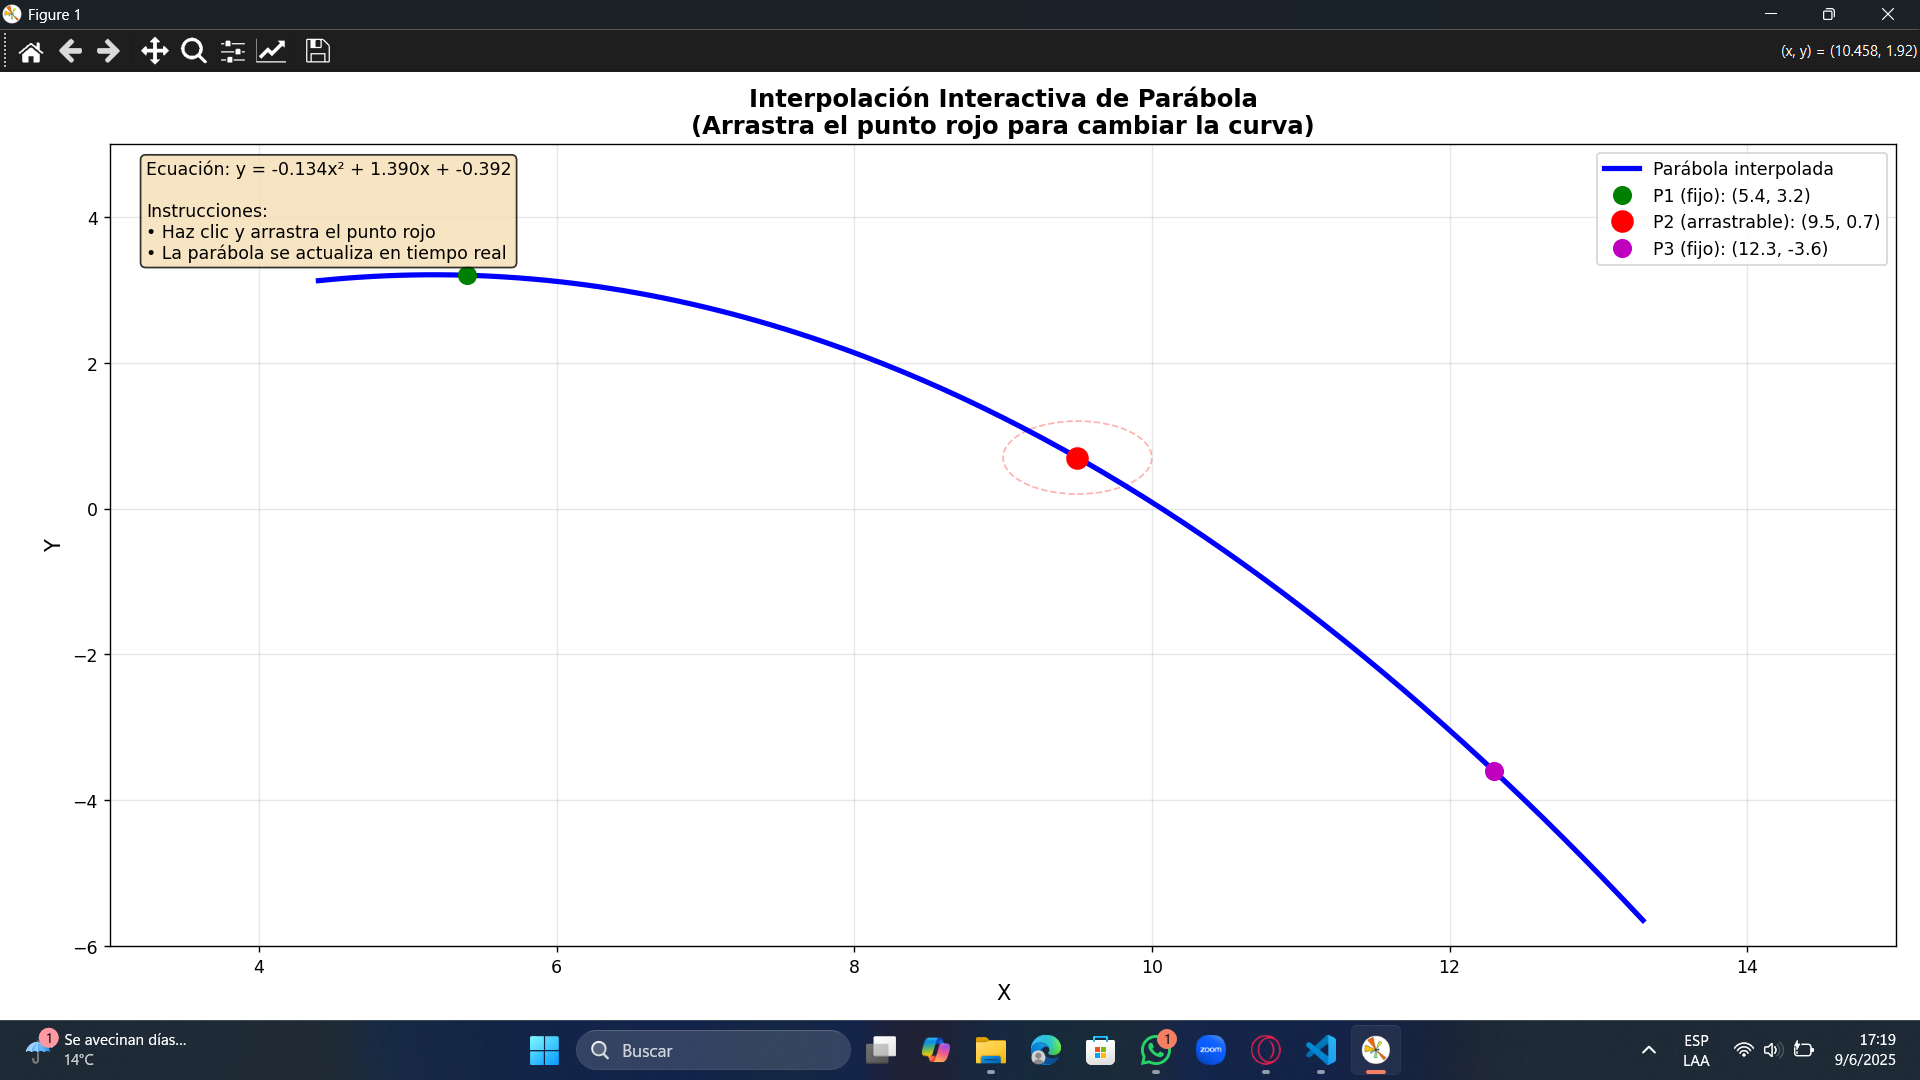

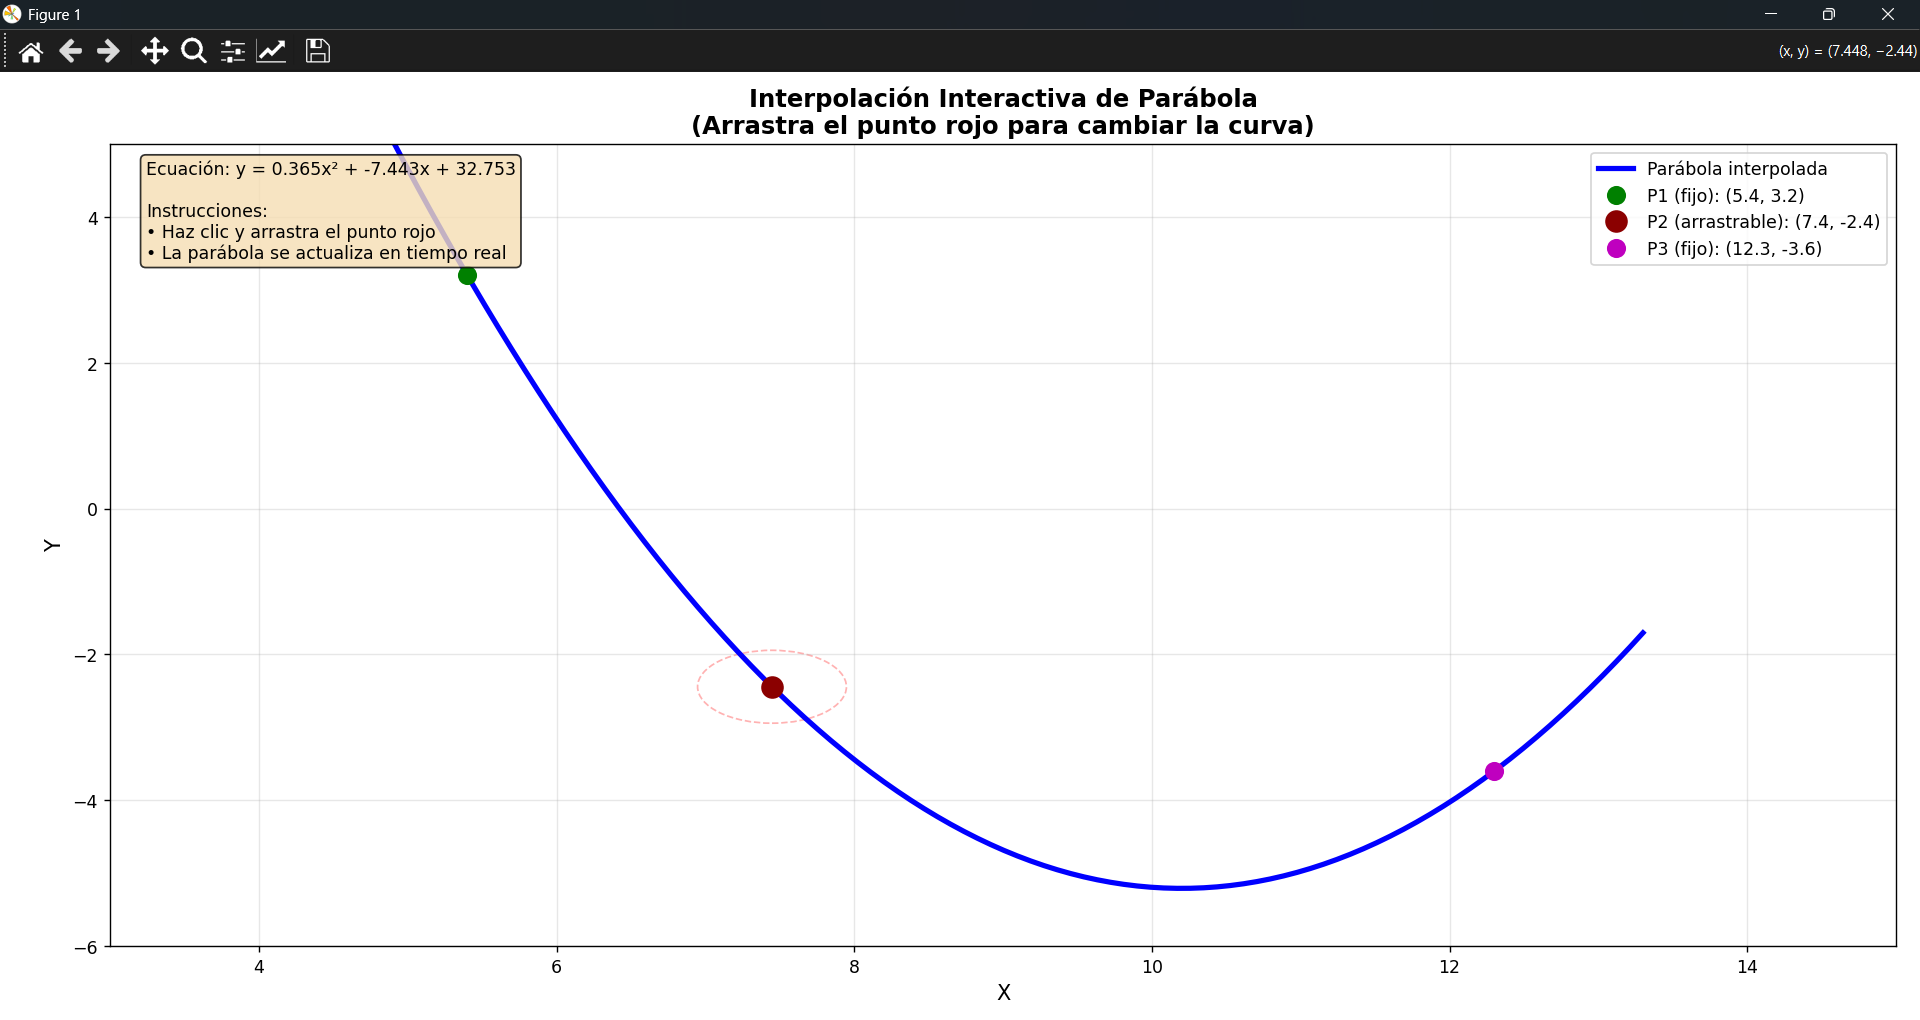

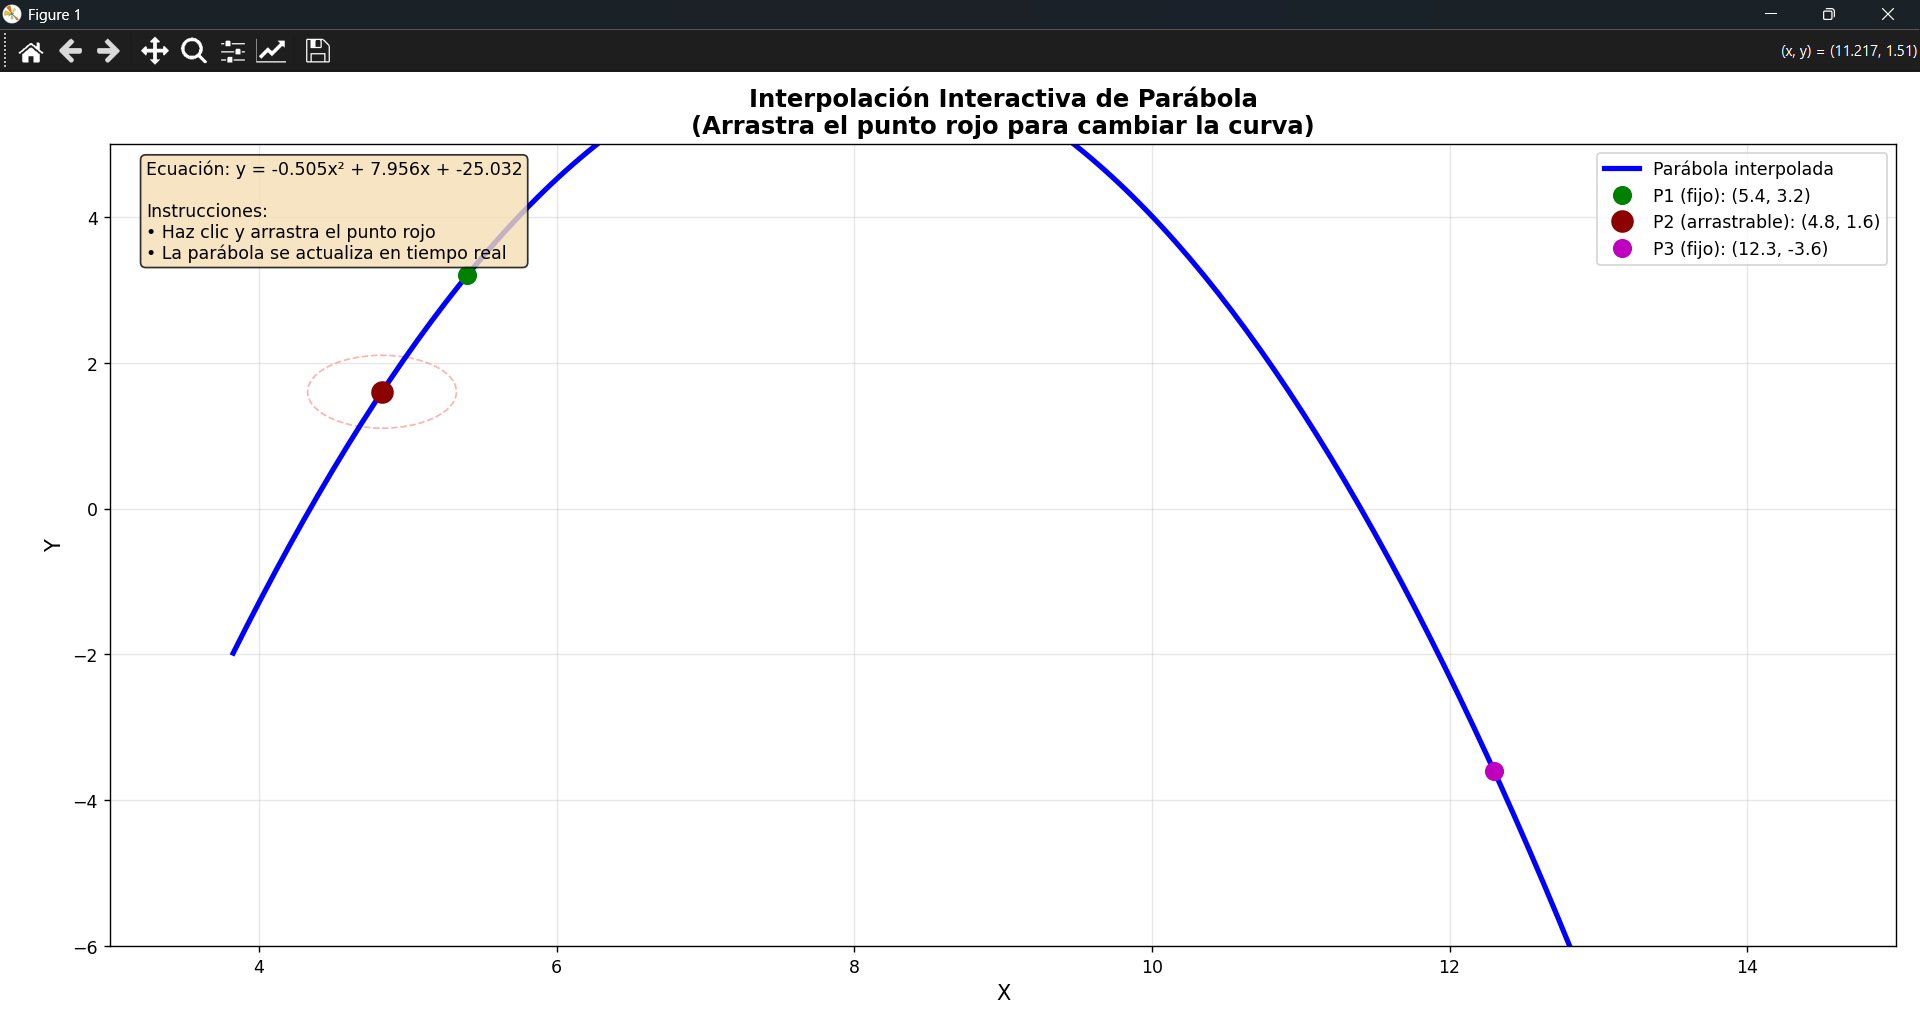

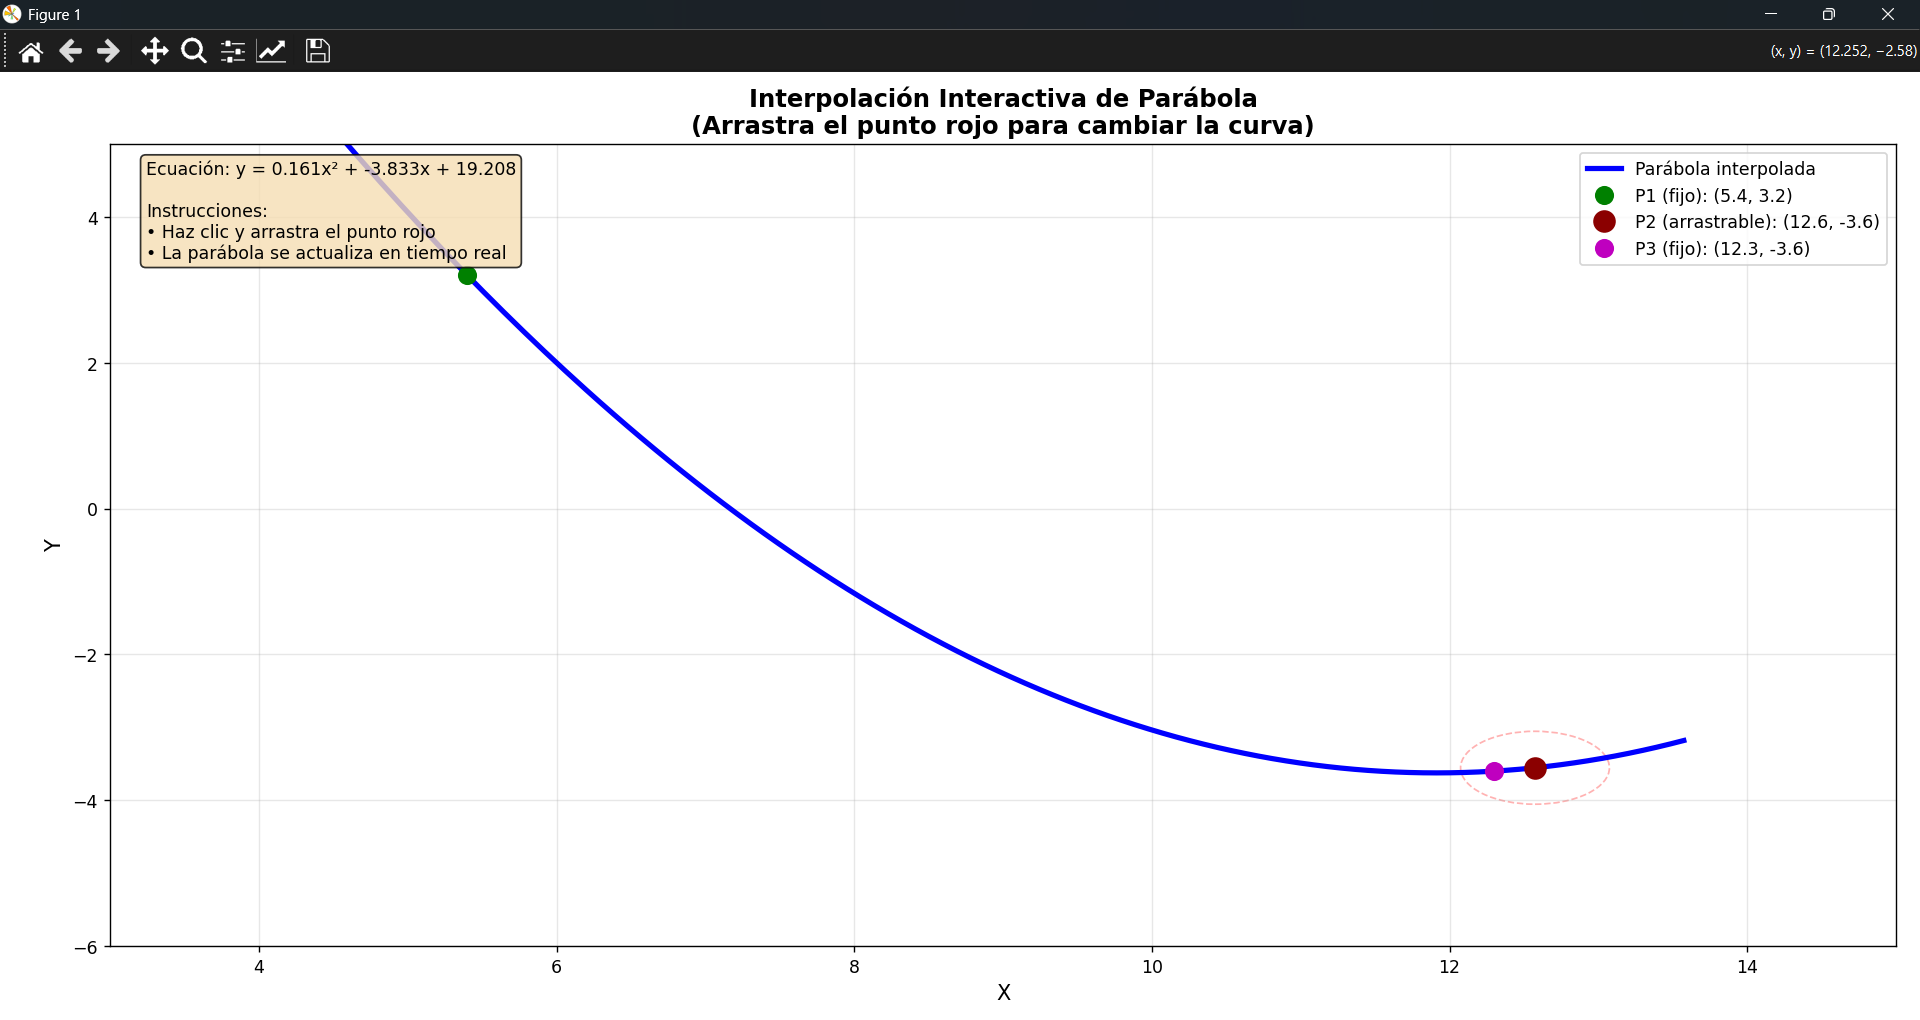